In [41]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline


In [42]:
df=pd.read_csv('height_weight_data.csv')

In [43]:
df.head()

,height,weight
0,150,45
1,151,47
2,152,49
3,153,50
4,154,52


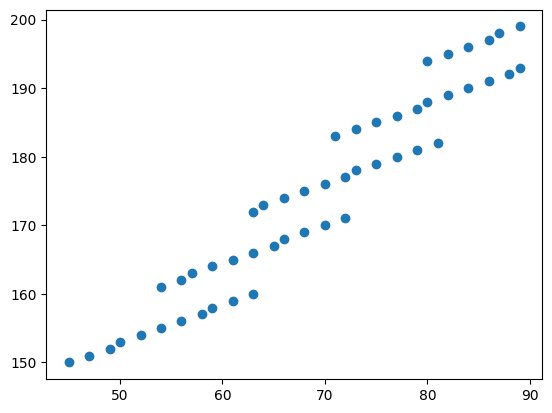

In [44]:
#scatter plot 
plt.scatter(df['weight'],df['height'])

In [45]:
## Correlation
df.corr()

,height,weight
height,1.00000,0.96572
weight,0.96572,1.00000


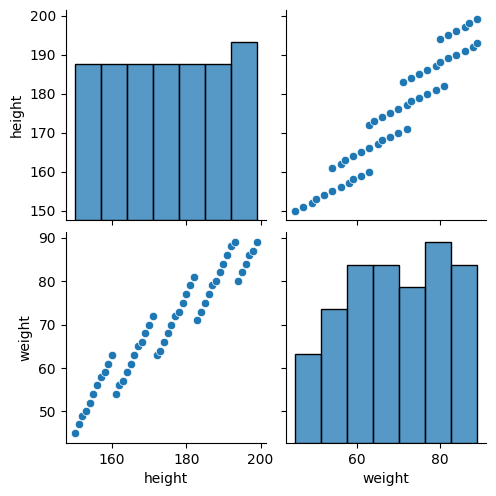

In [46]:
#seaborn as sns
import seaborn as sns
sns.pairplot(df)

In [47]:
## Independent and Dependent features
X=df[['weight']] # independent feature should be data frame or 2 dimensional 
y=df['height'] # can be in a series or 1D array
X.head()


,weight
0,45
1,47
2,49
3,50
4,52


In [48]:
X_series=df['weight']
np.array(X_series).shape

(50,)

In [49]:
np.array(y).shape

(50,)

In [50]:
## Train Test Spilt
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [51]:
#Standardization
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
print(X_train)
 

[[-0.77560796]
 [-1.49705335]
 [-1.01608976]
 [ 1.38872822]
 [ 1.22840702]
 [ 1.38872822]
 [-0.61528676]
 [-0.61528676]
 [-0.45496556]
 [-0.21448377]
 [ 0.34664043]
 [ 0.82760402]
 [-1.89785635]
 [ 0.90776462]
 [ 0.26647983]
 [ 0.18631923]
 [-1.17641096]
 [ 0.50696163]
 [-1.17641096]
 [ 0.66728283]
 [-1.73753515]
 [ 0.26647983]
 [-1.57721395]
 [ 1.62921002]
 [ 0.50696163]
 [-0.37480496]
 [ 1.22840702]
 [-0.45496556]
 [-0.45496556]
 [-0.21448377]
 [ 1.62921002]
 [ 0.10615863]
 [-0.85576856]
 [ 1.54904942]
 [-0.77560796]
 [ 0.34664043]
 [ 0.90776462]]


In [52]:
X_train.shape

(37, 1)

In [53]:
X_test=sc.transform(X_test)
print(X_test)

[[-0.93592916]
 [ 1.06808582]
 [ 0.66728283]
 [ 1.06808582]
 [-0.29464436]
 [ 1.46888882]
 [ 0.10615863]
 [-0.05416257]
 [ 0.98792522]
 [-0.05416257]
 [-1.01608976]
 [-1.33673215]
 [ 0.82760402]]


In [54]:
## Apply the linear regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)


LinearRegression()

In [55]:
print("Coefficient or slope:",lr.coef_)
print("Intercept:",lr.intercept_)

Coefficient or slope: [14.33305475]
Intercept: 173.72972972972974


In [56]:
print(lr.predict([[72]]))

[1205.70967159]


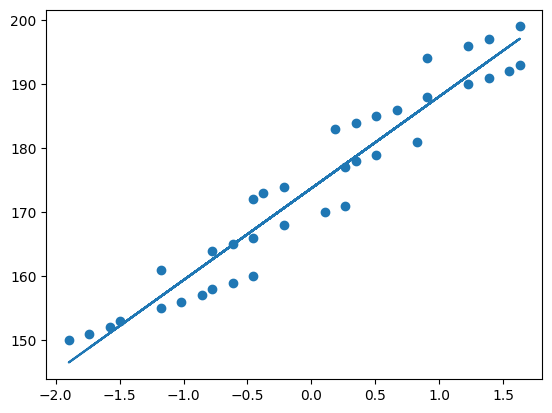

In [57]:
## Plot training data plot best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,lr.predict(X_train))



In [58]:
## Prediction
y_pred=lr.predict(X_test)

In [59]:
# Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error


In [60]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)

print(mse)
print(mae)
print(rmse)

10.43341415592357
2.704069828317656
3.230079589719667


In [61]:
# R2 Score
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)


0.9372286581576688


In [62]:
No_of_Independent_feature=X_test.shape[1]

In [63]:
AdjustedR2=1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(AdjustedR2)

0.9315221725356386


In [64]:
#OLS Linear regression
import statsmodels.api as sm
model=sm.OLS(y_train,X_train).fit()


In [65]:
prediction=model.predict(X_test)
print(prediction)

[-13.41472386  15.30893256   9.56420127  15.30893256  -4.22315381
  21.05366384   1.52157748  -0.77631504  14.1599863   -0.77631504
 -14.56367012 -19.15945515  11.86209379]


In [66]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 height   R-squared (uncentered):                   0.007
Model:                            OLS   Adj. R-squared (uncentered):             -0.021
Method:                 Least Squares   F-statistic:                             0.2449
Date:                Fri, 18 Apr 2025   Prob (F-statistic):                       0.624
Time:                        15:47:33   Log-Likelihood:                         -243.34
No. Observations:                  37   AIC:                                      488.7
Df Residuals:                      36   BIC:                                      490.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [70]:
## Prediction for new data
lr.predict(sc.transform([[72]]))

array([173.72972973])